# 9. Merged dataset - evaluate parameter sets performance (100 CVs)

- reload preprocessed dataset with merged cohorts
- for each parameter/setting set (3P/5P, with aPTT/INR, only LSM, with or without balancing):
    - create a subset of all patients with all necessary records available
    - run 100 5-fold cross-validations for each of the 5 models:
        - logistic regression, MLP, random forest, SVM, XGBoost
    - report AUC from each fold
    - calculate mean/median AUCs across all CVs
    - plot mean AUCs (each point = 1 CV, represented by its mean AUC value, final reported value = mean)
    - perform this first only on the VIENNA cohort, then on the merged cohort
- corresponds to part of Figure 2 and entire Figure 3
    
<sub>original notebook name: `VICIS_15_collaborator_data_CVs_models_rerun.ipynb`</sub>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# prediction models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# plotting configuration - set size, use high resolution
from IPython.display import set_matplotlib_formats
from matplotlib import rc_params
plt.rcParams['figure.figsize'] = [11, 5]
set_matplotlib_formats('retina')
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 11

/var/folders/rb/y91w78gd2_sdrdl2sglwd_q91gs47h/T/ipykernel_1132/1299526473.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
import HVPG16_functions

In [3]:
preprocessed_data_path = "/Users/jreinis/OneDrive/Rotation/rotation/data_collaborators_updated_v3/merged_datasets_HVPG_strictly_compensated_center_names.csv"
output_plots_path = "/Users/jreinis/OneDrive/Rotation/rotation/HVPG16_manuscript_figures/models_performance_comparison/"
output_AUCs_path = "/Users/jreinis/OneDrive/Rotation/rotation/results_CVs_AUCs/"

In [4]:
data = pd.read_csv(preprocessed_data_path)
# call liver stiffness just LSM
data.rename(columns = {"VCTE-LSM-kPa":"LSM"}, inplace=True)

In [5]:
models = [LogisticRegression(C = 1, max_iter=15000, warm_start=False),
          MLPClassifier(hidden_layer_sizes=(20,20,20,), max_iter=2000, warm_start=False, alpha=.001),
          RandomForestClassifier(n_estimators = 100, warm_start=False),
          SVC(kernel='rbf', C = 0.8, probability=True),
          XGBClassifier(n_estimators = 100, verbosity = 0)]
names = ["Logistic Reg", "MLP", "Random Forest", "SVM", "XGBoost"]

n_cv = 100

### Vienna cohort only

#### 5-parameter

In [6]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "aPTT", "CHE", "GGT"], "5P"

5 variables (PLT, BILI, aPTT, CHE, GGT), VIENNA cohort(s), 138 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.878436,0.005104,0.882716,0.005104
1,MLP,0.763078,0.009047,0.783333,0.009047
2,Random Forest,0.858495,0.005364,0.861111,0.005364
3,SVM,0.764506,0.007863,0.772222,0.007863
4,XGBoost,0.833524,0.005813,0.838889,0.005813


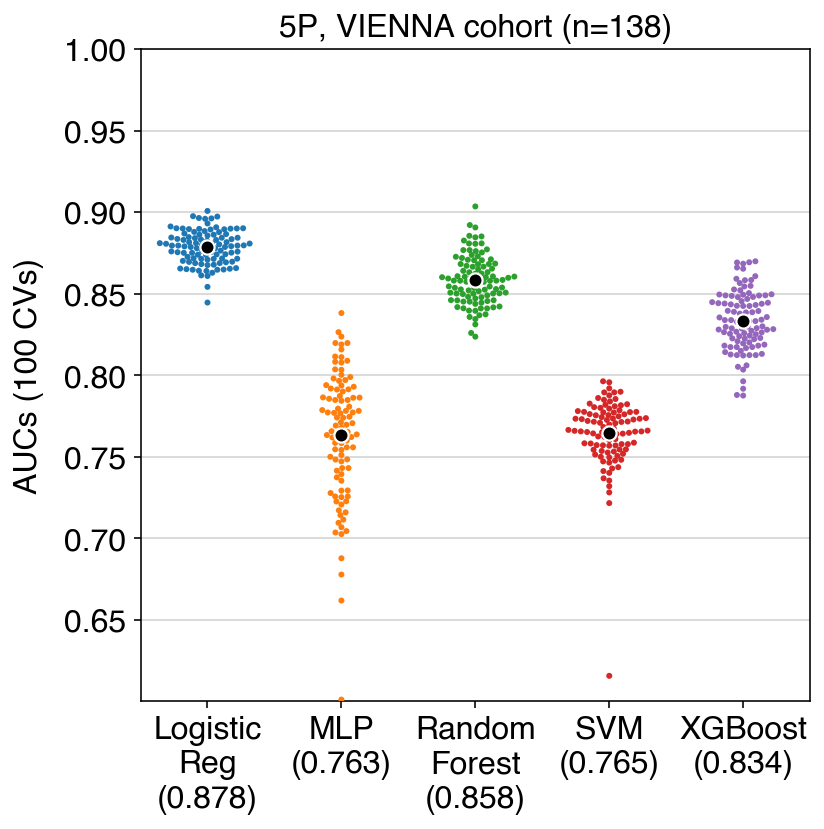

In [7]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

In [8]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "aPTT"], "3P" 

3 variables (PLT, BILI, aPTT), VIENNA cohort(s), 138 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.846464,0.006347,0.850926,0.006347
1,MLP,0.792784,0.008087,0.800000,0.008087
2,Random Forest,0.830954,0.006032,0.836111,0.006032
3,SVM,0.799140,0.006699,0.802469,0.006699
4,XGBoost,0.817910,0.005974,0.821605,0.005974


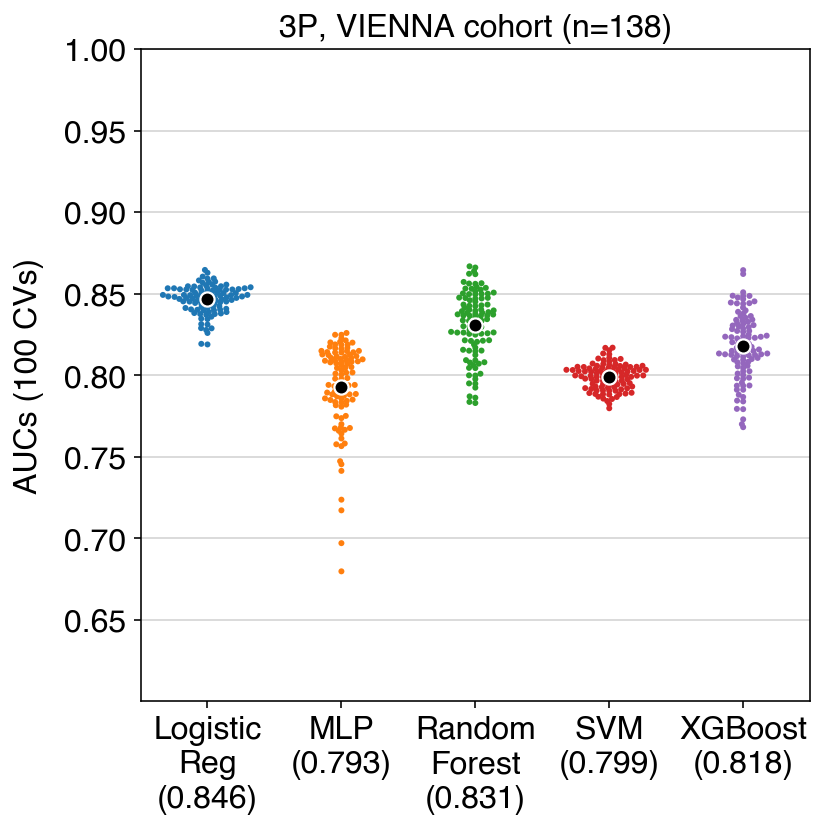

In [9]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-parameter including liver stiffness

In [10]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "aPTT", "CHE", "GGT", "LSM"], "5P + LSM"

6 variables (PLT, BILI, aPTT, CHE, GGT, LSM), VIENNA cohort(s), 129 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.889436,0.005332,0.901961,0.005332
1,MLP,0.772487,0.009348,0.790850,0.009348
2,Random Forest,0.860577,0.005620,0.862745,0.005620
3,SVM,0.785718,0.007811,0.797386,0.007811
4,XGBoost,0.839382,0.005720,0.843137,0.005720


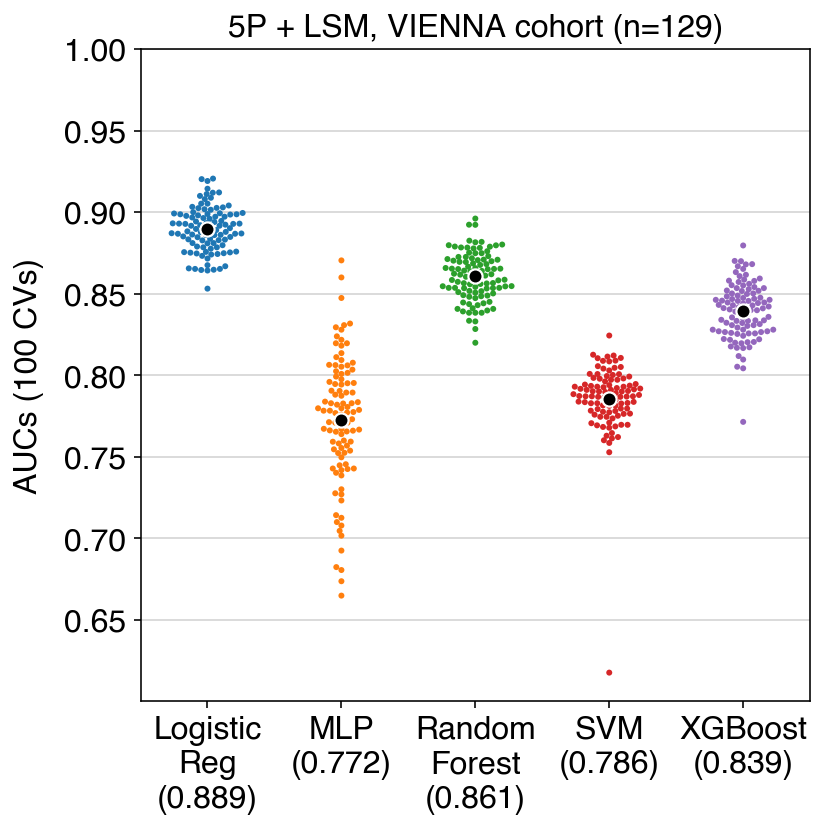

In [11]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter including liver stiffness

In [12]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "aPTT", "LSM"], "3P + LSM"

4 variables (PLT, BILI, aPTT, LSM), VIENNA cohort(s), 129 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.873342,0.005663,0.882353,0.005663
1,MLP,0.813373,0.009220,0.826797,0.009220
2,Random Forest,0.830346,0.006192,0.835580,0.006192
3,SVM,0.846917,0.006345,0.849673,0.006345
4,XGBoost,0.808363,0.006456,0.810458,0.006456


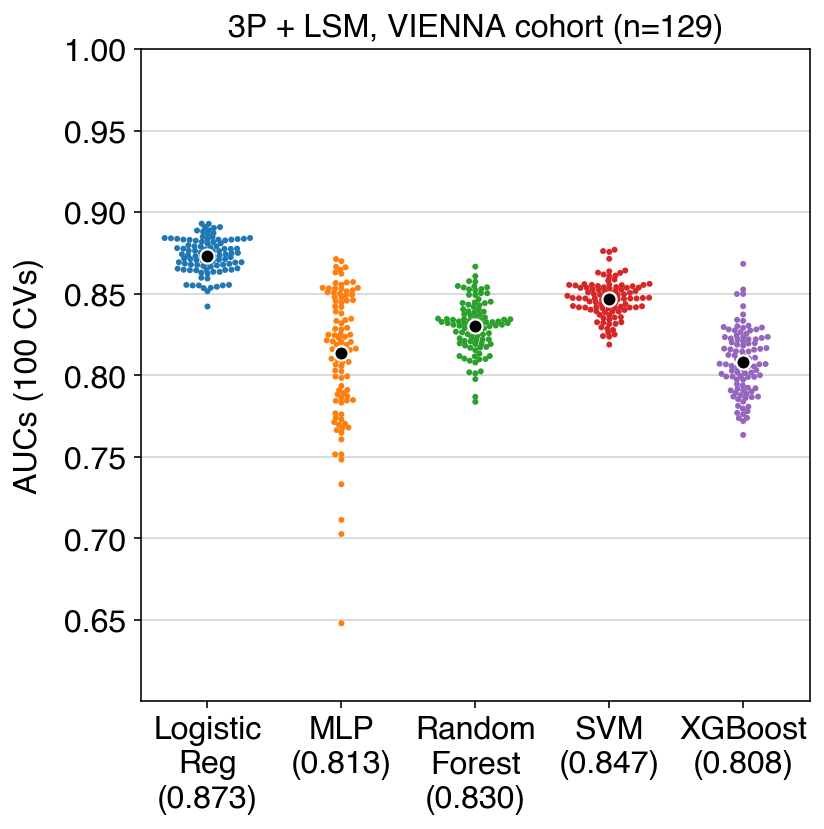

In [13]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Merged cohorts

#### 5-parameter

In [14]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT"], "5P"

5 variables (PLT, BILI, aPTT, CHE, GGT), merged cohort(s), 209 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.810569,0.005377,0.813776,0.005377
1,MLP,0.701995,0.008921,0.712657,0.008921
2,Random Forest,0.788665,0.005519,0.791725,0.005519
3,SVM,0.719066,0.007508,0.726483,0.007508
4,XGBoost,0.744059,0.005913,0.745679,0.005913


/Users/jreinis/miniconda3/envs/test/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


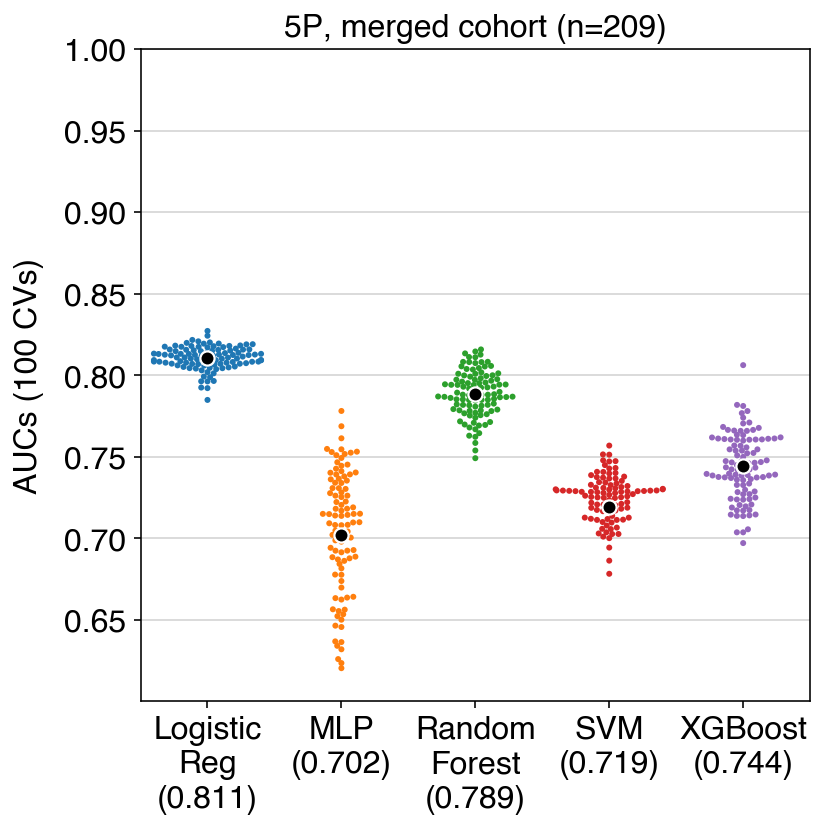

In [15]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

In [16]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT"], "3P"

3 variables (PLT, BILI, aPTT), merged cohort(s), 720 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.744690,0.003218,0.744025,0.003218
1,MLP,0.741044,0.003335,0.739939,0.003335
2,Random Forest,0.725444,0.003139,0.727017,0.003139
3,SVM,0.731018,0.003334,0.730337,0.003334
4,XGBoost,0.701062,0.003231,0.701328,0.003231


/Users/jreinis/miniconda3/envs/test/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


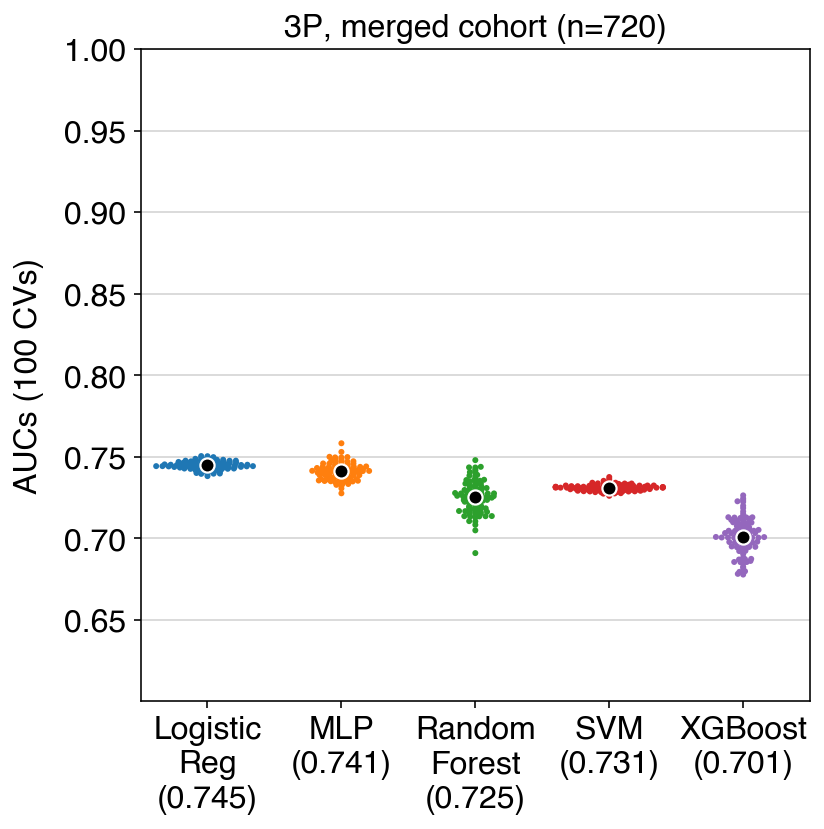

In [17]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-parameter including liver stiffness

In [18]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT", "LSM"], "5P + LSM"

6 variables (PLT, BILI, aPTT, CHE, GGT, LSM), merged cohort(s), 165 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.855036,0.005444,0.862374,0.005444
1,MLP,0.748665,0.008735,0.752066,0.008735
2,Random Forest,0.841741,0.005227,0.845041,0.005227
3,SVM,0.770229,0.006826,0.776860,0.006826
4,XGBoost,0.809132,0.005675,0.805785,0.005675


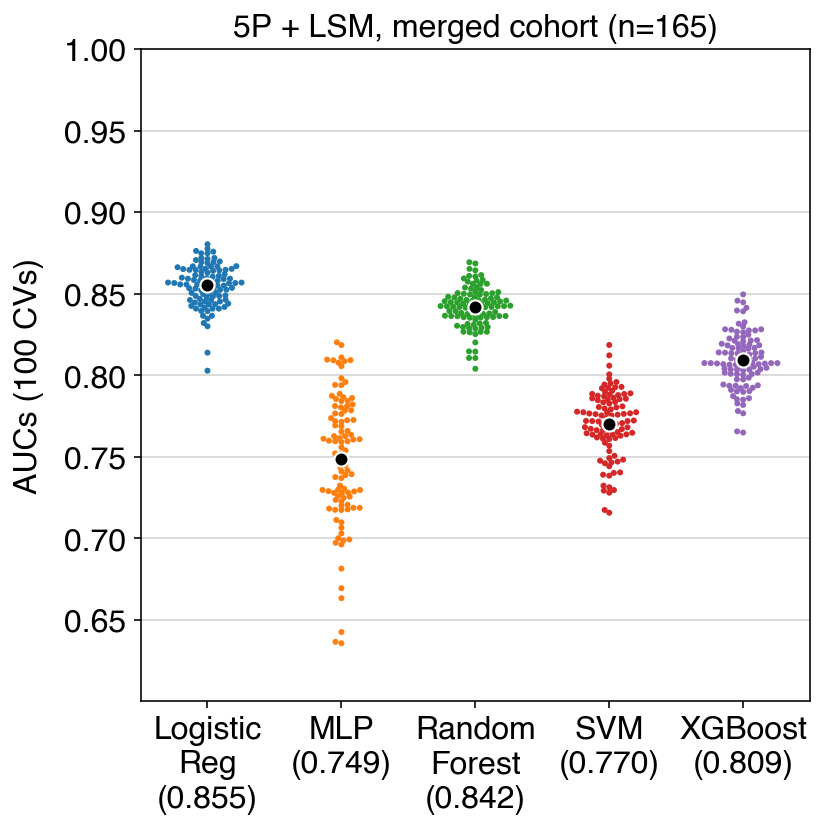

In [19]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter including liver stiffness

In [20]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "LSM"], "3P + LSM"

4 variables (PLT, BILI, aPTT, LSM), merged cohort(s), 513 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.840616,0.003146,0.842313,0.003146
1,MLP,0.827743,0.003282,0.828358,0.003282
2,Random Forest,0.820182,0.003133,0.820685,0.003133
3,SVM,0.844454,0.003087,0.845357,0.003087
4,XGBoost,0.788937,0.003269,0.790008,0.003269


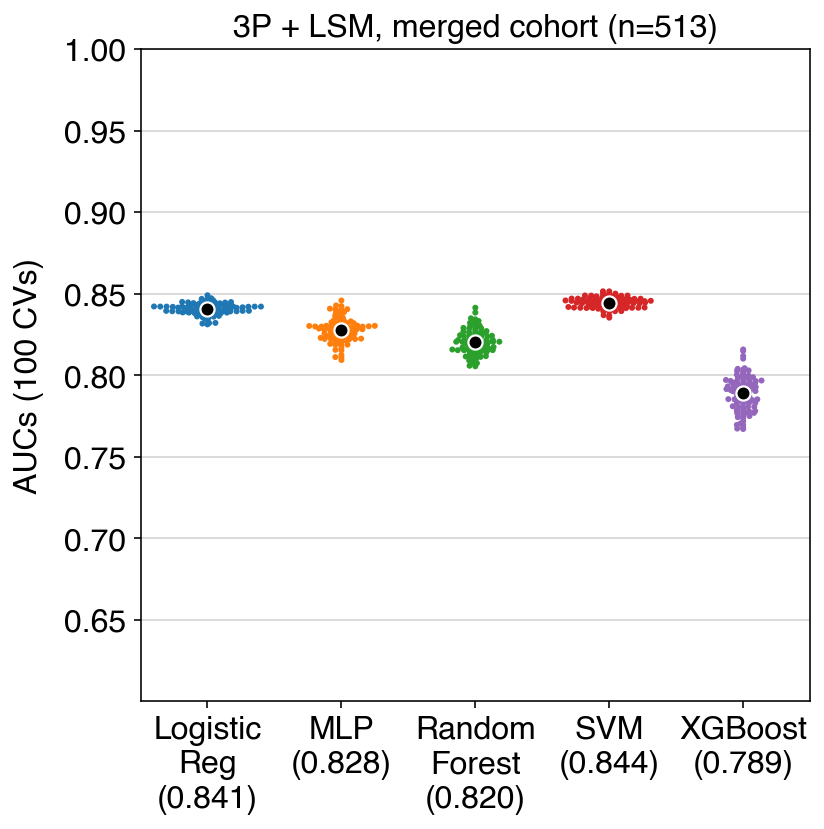

In [21]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Merged cohorts but with INR

#### 5-parameter

In [22]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR", "CHE", "GGT"], "5P-INR"

5 variables (PLT, BILI, INR, CHE, GGT), merged cohort(s), 250 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.758091,0.005514,0.761141,0.005514
1,MLP,0.686917,0.007527,0.696078,0.007527
2,Random Forest,0.727986,0.005553,0.727431,0.005553
3,SVM,0.714550,0.006396,0.716796,0.006396
4,XGBoost,0.677585,0.005761,0.672014,0.005761


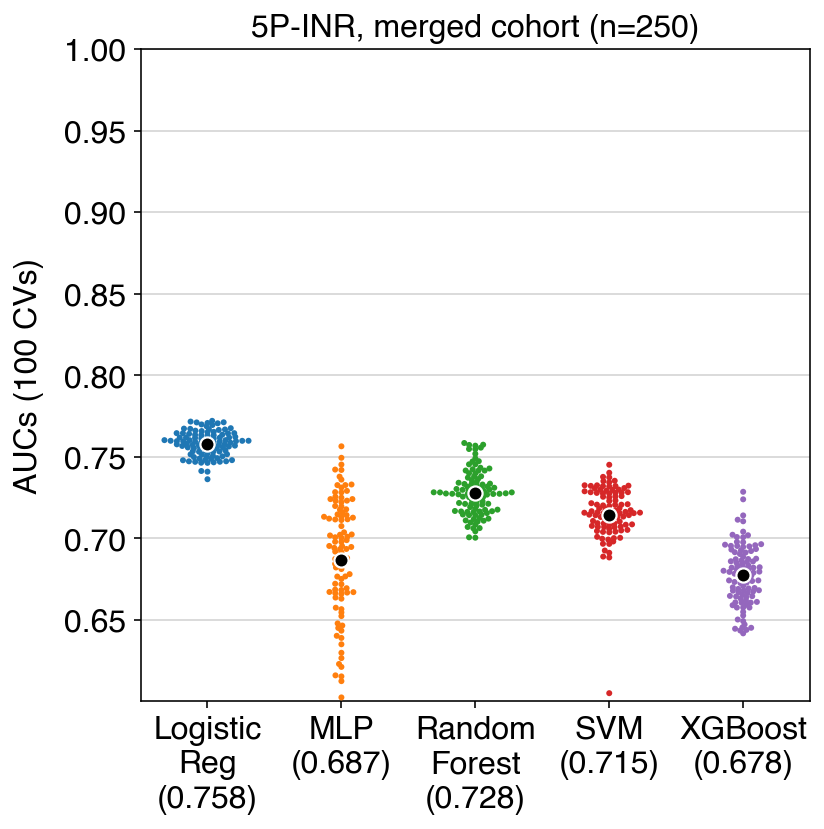

In [23]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

In [24]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P-INR"

3 variables (PLT, BILI, INR), merged cohort(s), 968 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.733186,0.002624,0.734050,0.002624
1,MLP,0.723994,0.002719,0.724731,0.002719
2,Random Forest,0.701066,0.002760,0.703543,0.002760
3,SVM,0.699993,0.002814,0.700626,0.002814
4,XGBoost,0.688583,0.002863,0.689445,0.002863


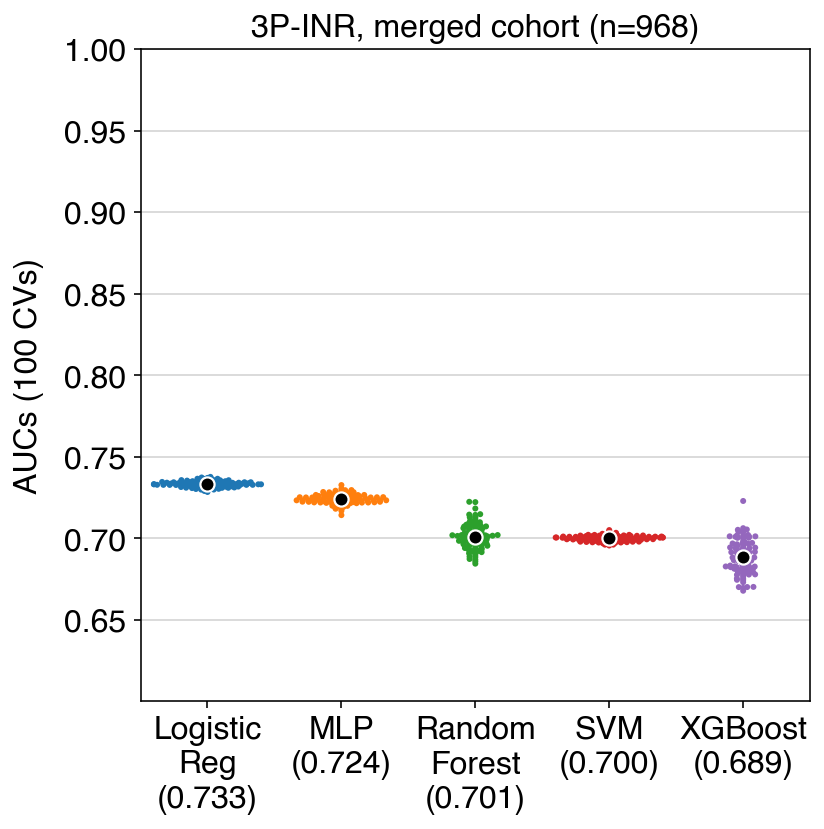

In [25]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Merged cohorts, with balancing

#### 5-parameter

In [26]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT"], "5P"

5 variables (PLT, BILI, aPTT, CHE, GGT), merged cohort(s), 144 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.794293,0.006738,0.795238,0.006738
1,MLP,0.667481,0.008880,0.676190,0.008880
2,Random Forest,0.776747,0.006782,0.775850,0.006782
3,SVM,0.720688,0.008150,0.724490,0.008150
4,XGBoost,0.741399,0.006852,0.742857,0.006852


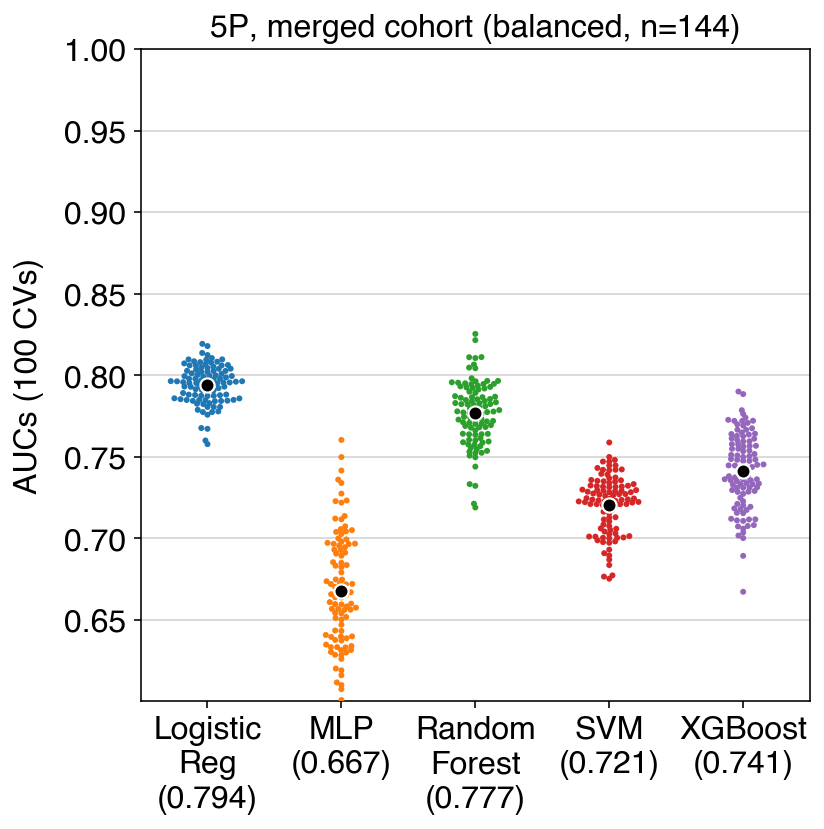

In [27]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

In [28]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT"], "3P"

3 variables (PLT, BILI, aPTT), merged cohort(s), 550 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.741435,0.003659,0.742479,0.003659
1,MLP,0.740549,0.003613,0.740000,0.003613
2,Random Forest,0.737387,0.003717,0.734959,0.003717
3,SVM,0.739722,0.003655,0.737851,0.003655
4,XGBoost,0.705143,0.003886,0.704959,0.003886


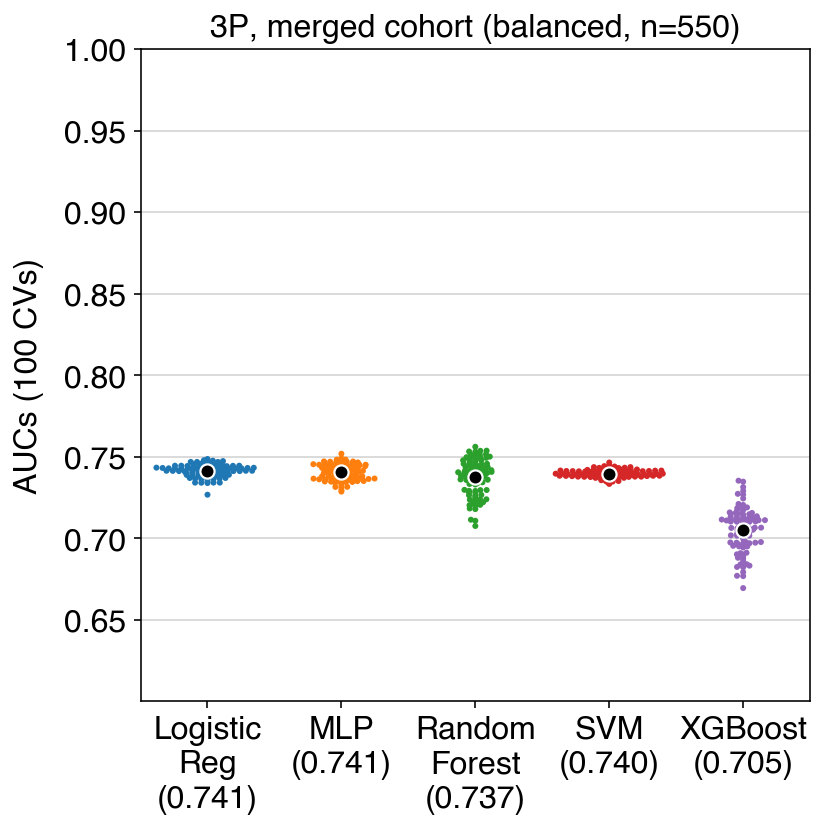

In [29]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-parameter including liver stiffness

In [30]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT", "LSM"], "5P + LSM"

6 variables (PLT, BILI, aPTT, CHE, GGT, LSM), merged cohort(s), 112 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.868409,0.006359,0.876033,0.006359
1,MLP,0.790646,0.008895,0.802342,0.008895
2,Random Forest,0.879525,0.005705,0.884298,0.005705
3,SVM,0.790886,0.007939,0.801653,0.007939
4,XGBoost,0.860260,0.005906,0.863636,0.005906


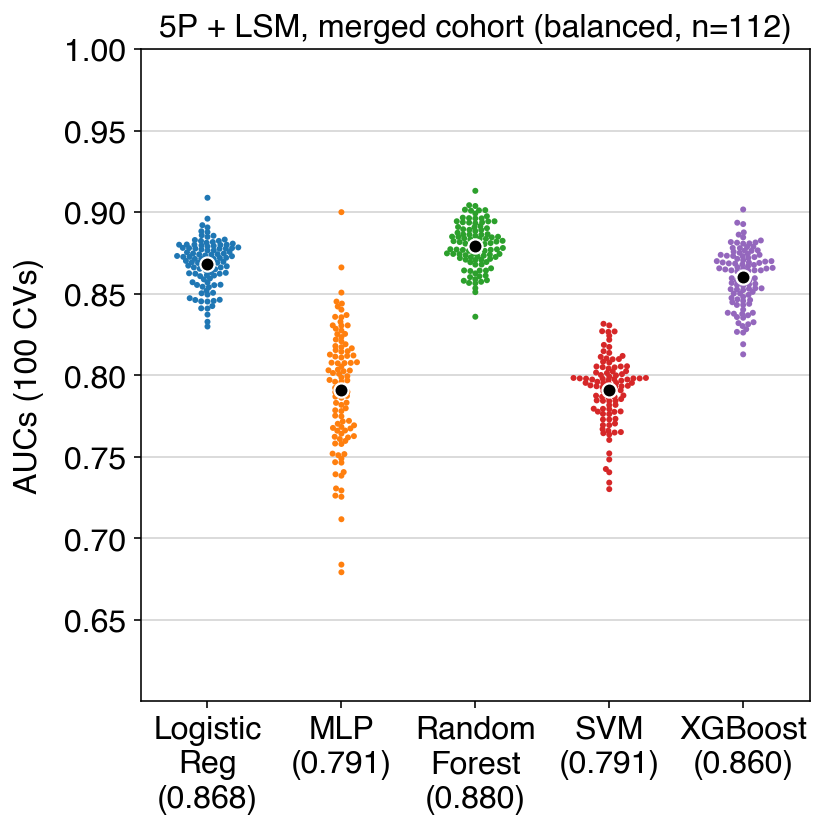

In [31]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter including liver stiffness

In [32]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "LSM"], "3P + LSM"

4 variables (PLT, BILI, aPTT, LSM), merged cohort(s), 358 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.828789,0.003748,0.831746,0.003748
1,MLP,0.814846,0.003929,0.817130,0.003929
2,Random Forest,0.810882,0.003911,0.812693,0.003911
3,SVM,0.826736,0.003788,0.827855,0.003788
4,XGBoost,0.775385,0.003976,0.775827,0.003976


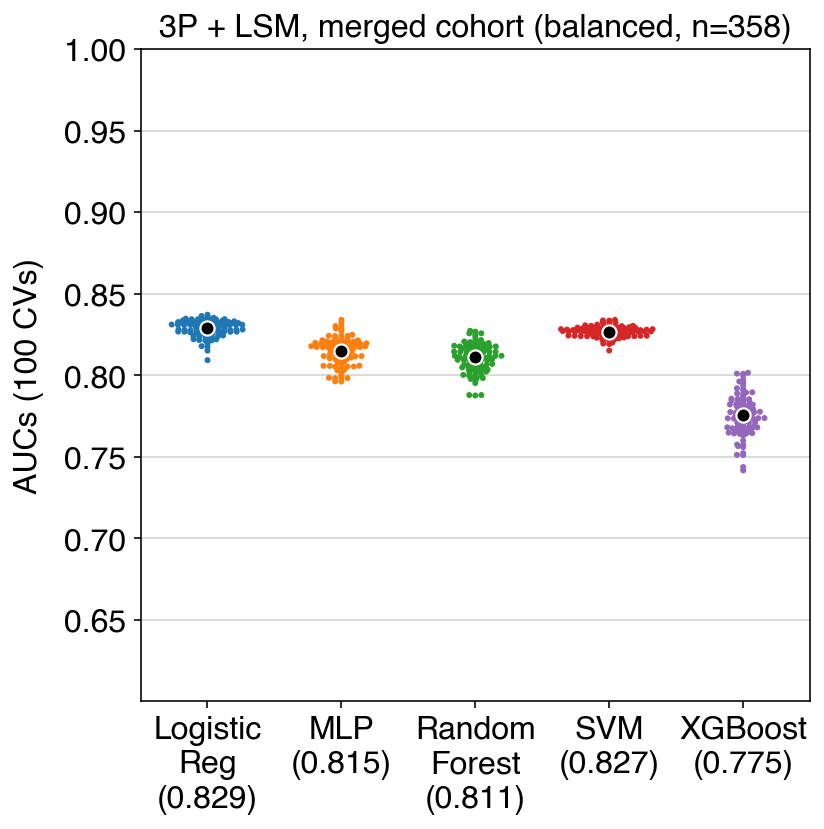

In [33]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Liver stiffness only

#### No balancing

In [34]:
cohort, variables, title = "merged", ["LSM"], "LSM only"

1 variables (LSM), merged cohort(s), 635 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.785997,0.003342,0.786485,0.003342


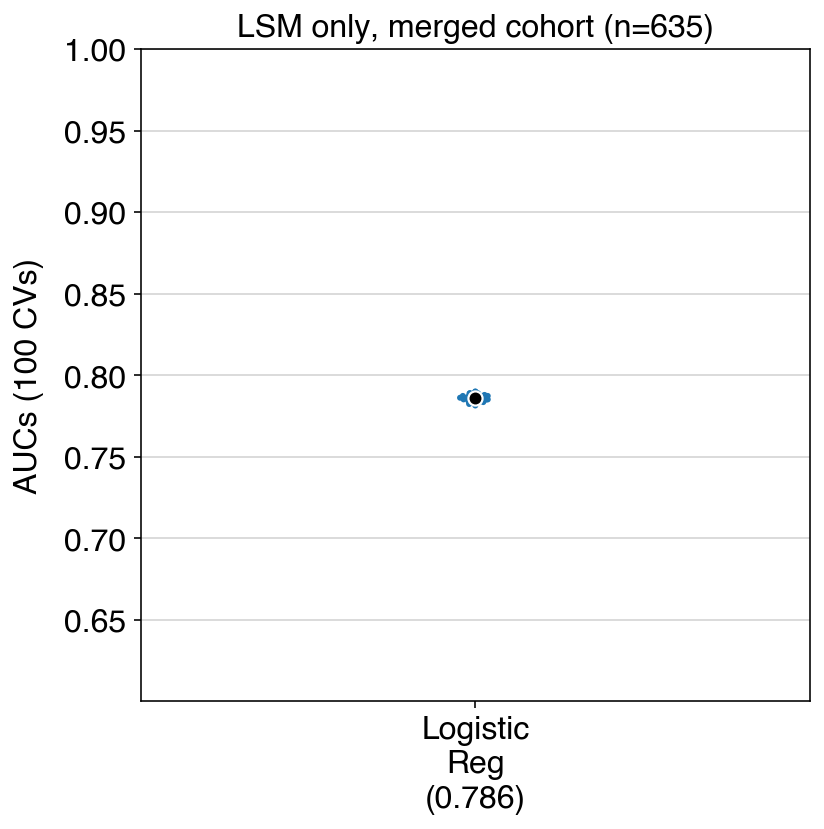

In [35]:
_ = HVPG16_functions.test_models_variables(data, models[:1], names[:1], variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### With balancing

In [36]:
cohort, variables, title = "merged", ["LSM"], "LSM only"

1 variables (LSM), merged cohort(s), 418 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.792589,0.003801,0.792942,0.003801


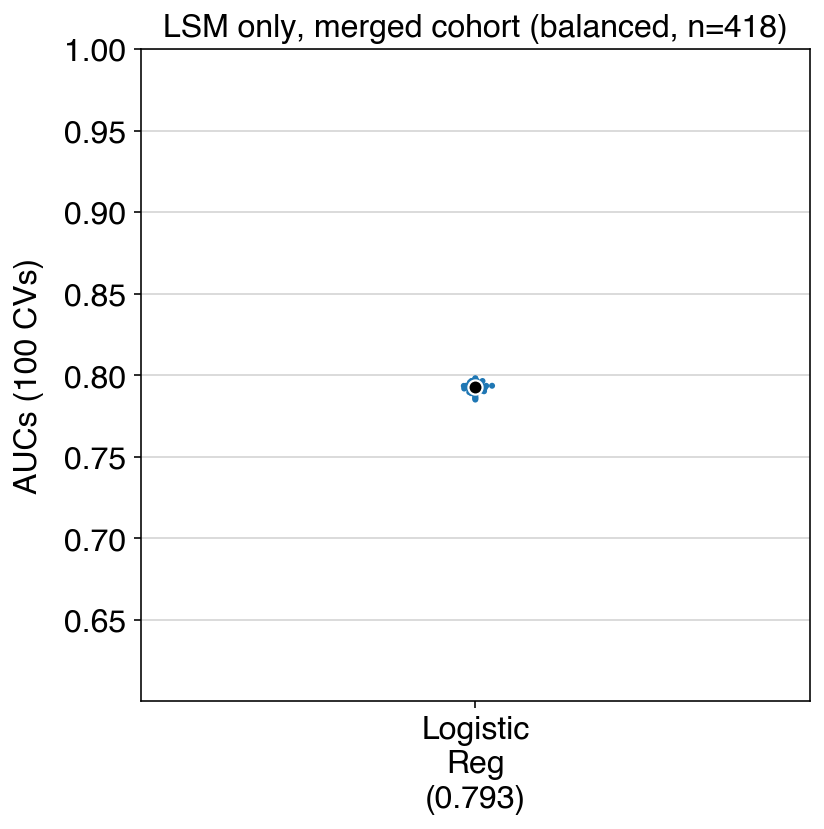

In [37]:
_ = HVPG16_functions.test_models_variables(data, models[:1], names[:1], variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)